In [1]:
# Load data1
import pandas as pd
import numpy as np
data1=pd.read_csv('/Users/guqian/Desktop/LSE/ST443/project/ml_project/data/data1.csv') # replace with your path

,land_type,p_x,p_y,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,...,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218,rgb_hex,overlay_hex
0,valley floor / meadow,0,0,0.0174,0.0131,0.0108,0.0133,0.0158,0.0144,0.0151,...,0.0237,0.0231,0.0224,0.0246,0.0255,0.0174,0.0234,0.0147,#030B05,#25C77140
1,valley floor / meadow,1,0,0.0180,0.0124,0.0116,0.0143,0.0154,0.0136,0.0151,...,0.0289,0.0275,0.0288,0.0293,0.0286,0.0211,0.0229,0.0176,#040A09,#25C77140
2,valley floor / meadow,2,0,0.0151,0.0150,0.0113,0.0158,0.0167,0.0158,0.0163,...,0.0358,0.0319,0.0355,0.0274,0.0303,0.0232,0.0282,0.0181,#08110B,#25C77140
3,valley floor / meadow,3,0,0.0172,0.0149,0.0095,0.0156,0.0154,0.0169,0.0176,...,0.0310,0.0294,0.0307,0.0238,0.0304,0.0232,0.0247,0.0087,#0C160C,#25C77140
4,valley floor / meadow,4,0,0.0184,0.0149,0.0143,0.0189,0.0174,0.0174,0.0182,...,0.0428,0.0372,0.0407,0.0344,0.0415,0.0287,0.0317,0.0176,#0E180C,#25C77140


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215604 entries, 0 to 215603
Columns: 223 entries, land_type to overlay_hex
dtypes: float64(218), int64(2), object(3)
memory usage: 366.8+ MB


None

,p_x,p_y,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,...,Band_209,Band_210,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218
count,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,...,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000
mean,176.934871,303.167789,0.095601,0.094335,0.095621,0.099081,0.100492,0.101252,0.102764,0.104476,...,0.110929,0.108438,0.108563,0.105381,0.105773,0.100424,0.099806,0.095834,0.092850,0.086839
std,102.491875,175.323061,0.164291,0.163833,0.165067,0.166807,0.167414,0.167216,0.167939,0.168141,...,0.059208,0.059431,0.059182,0.059277,0.058764,0.057765,0.056946,0.057251,0.054999,0.056024
min,0.000000,0.000000,-0.012000,-0.012600,-0.011900,-0.008800,-0.009300,-0.009000,-0.007700,-0.007500,...,0.007400,0.005700,0.006900,0.003600,0.006800,0.002400,0.004100,0.001100,0.000100,-0.010000
25%,88.000000,151.000000,0.022600,0.020600,0.020000,0.022900,0.023400,0.023800,0.024500,0.025500,...,0.058600,0.055700,0.056000,0.052500,0.053500,0.048900,0.048900,0.044400,0.043600,0.036300
50%,177.000000,303.000000,0.037800,0.036800,0.037700,0.040600,0.041600,0.042200,0.043400,0.045300,...,0.101100,0.098200,0.098200,0.094900,0.095000,0.089600,0.089000,0.085100,0.082300,0.076000
75%,266.000000,455.000000,0.078000,0.078000,0.081100,0.083800,0.086100,0.087700,0.090000,0.092700,...,0.157700,0.155500,0.155300,0.152500,0.152300,0.146400,0.145100,0.141500,0.136700,0.132000
max,354.000000,607.000000,1.581000,1.574100,1.587100,1.595900,1.603600,1.605300,1.609500,1.613800,...,0.453700,0.446600,0.453600,0.449000,0.446700,0.429900,0.435100,0.433000,0.429100,0.411200


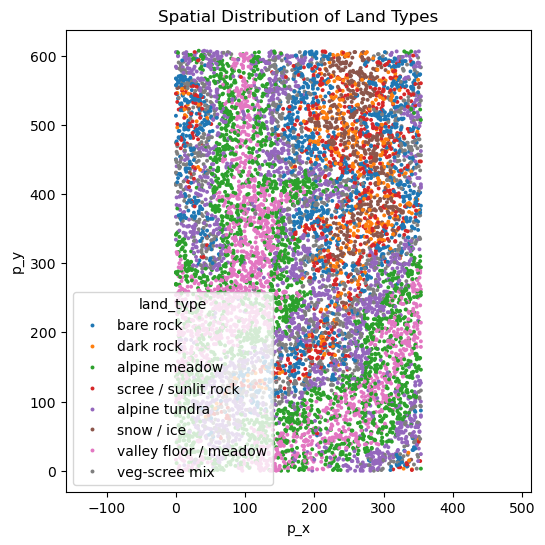

In [ ]:
# First view
display(data1.head())
display(data1.info())
display(data1.describe())

# Spatial distribution of land types (confirms figure 1 in the project description)
import seaborn as sns
import matplotlib.pyplot as plt
sample = data1.sample(10000, random_state=0)
plt.figure(figsize=(6,6))
sns.scatterplot(x="p_x", y="p_y", hue="land_type", data=sample, s=8, linewidth=0)
plt.title("Spatial Distribution of Land Types")
plt.axis("equal")
plt.show()

In [3]:
# Missing & invalid value check
bands = [col for col in data1.columns if col.startswith("Band")]
print("Total missing values:", data1.isna().sum().sum())
print("Negative reflectance values:", (data1[bands] < 0).sum().sum())
print("Reflectance values > 1:", (data1[bands] > 1).sum().sum())

# No missing values
# Some anomalous reflectance values (<0 or >1), some systematic observation errors like the sensor noise and shadowing may cause this.
# The anomalous may bother classification later? So shall we cap them to [0,1] range via:

# data1[bands] = data1[bands].clip(lower=0, upper=1)
# print("After clipping:")
# print("Min reflectance:", data1[bands].min().min())
# print("Max reflectance:", data1[bands].max().max())


# Outlier check
z = np.abs((data1[bands] - data1[bands].mean()) / data1[bands].std())
outliers = data1[np.any(z > 5, axis=1)]
print("Outlier rows (z > 5):", outliers.shape[0], "of", len(data1), 
      f"({outliers.shape[0]/len(data1)*100:.2f}% of total)")

# 1,925 rows (pixels) out of 218,680 total were flagged as having at least one spectral band with a z-score > 5 (i.e. more than 5 standard deviations from the mean).
# So 1925/218680 ~ 0.88% of data are potential outliers, which is acceptable (like really bright snow), no motivation to remove them.
# Column is still 223, no problem

Total missing values: 0
Negative reflectance values: 20000
Reflectance values > 1: 39777
Outlier rows (z > 5): 1925 of 215604 (0.89% of total)


,land_type,Count,Percentage
0,alpine meadow,50657,23.50
1,alpine tundra,38900,18.04
2,valley floor / meadow,38424,17.82
3,bare rock,26314,12.20
4,veg-scree mix,24495,11.36
5,scree / sunlit rock,15153,7.03
6,snow / ice,11533,5.35
7,dark rock,10128,4.70


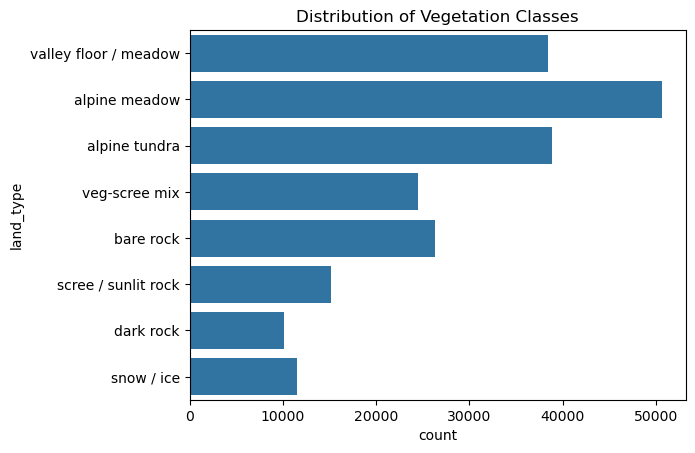

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Check distribution of vegetation classes to indentify potential imbalance(may affect classification later)
class_counts = data1["land_type"].value_counts()
class_percent = data1["land_type"].value_counts(normalize=True) * 100

balance_df = pd.DataFrame({
    "Count": class_counts,
    "Percentage": class_percent.round(2)
}).reset_index().rename(columns={"index": "Land Type"})

display(balance_df)
sns.countplot(y="land_type", data=data1)
plt.title("Distribution of Vegetation Classes")
plt.show()

# One can see that alpine meadow is the most domiant vegetation class.

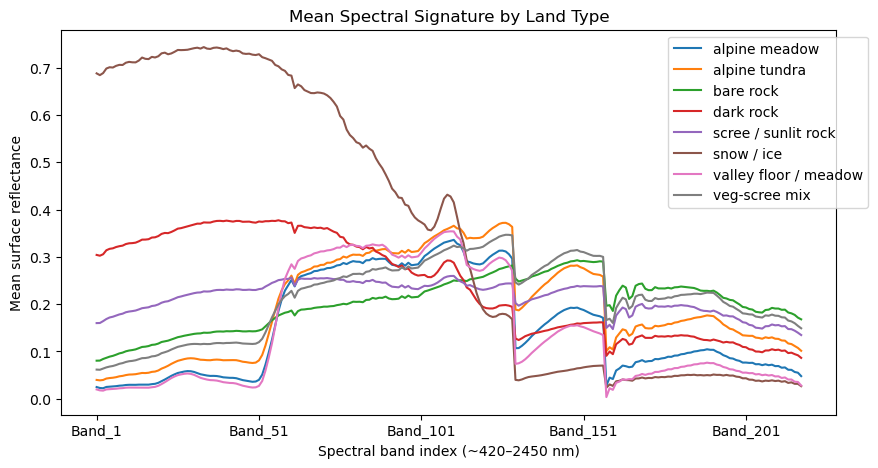

In [5]:
# Check if classes are separable in spectral space
mean_spectra = data1.groupby("land_type")[bands].mean().T
mean_spectra.plot(figsize=(10,5))
plt.xlabel("Spectral band index (~420–2450 nm)")
plt.ylabel("Mean surface reflectance")
plt.title("Mean Spectral Signature by Land Type")
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

# Lines that differ strongly → those classes are spectrally separable → classification should work well.
# Overlapping lines → those classes are spectrally similar → may need nonlinear models (e.g. GBDT / SVM).
# Smoothness across bands → confirms that adjacent bands are highly correlated. Motivates PCA or regularisation later.

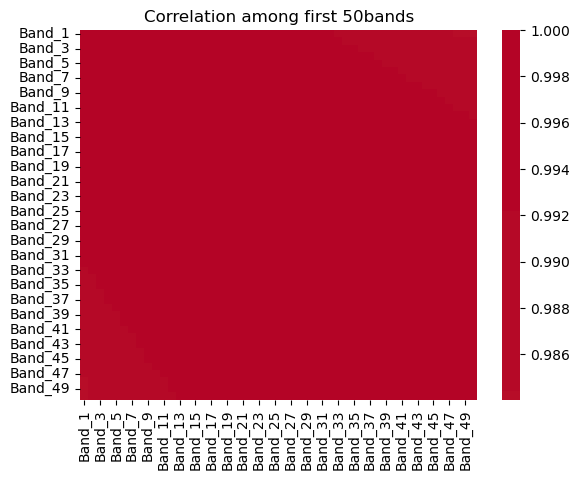

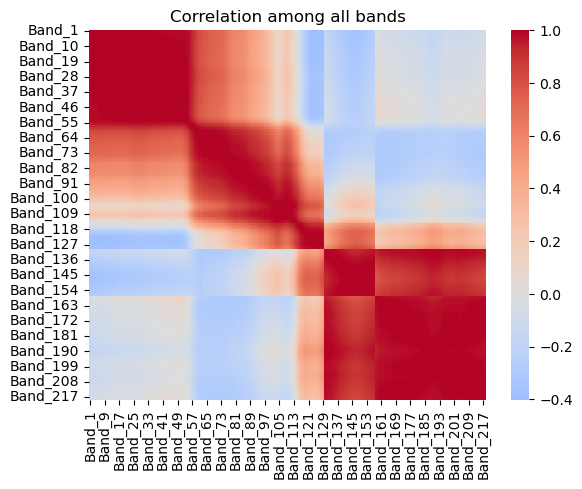

In [6]:
# Correlation heatmap for the first 50 bands
corr50 = data1[bands[:50]].corr()
sns.heatmap(corr50, cmap="coolwarm", center=0)
plt.title("Correlation among first 50bands")
plt.show()

# Correlation heatmap for all bands
corrfull = data1[bands].corr()
sns.heatmap(corrfull, cmap="coolwarm", center=0)
plt.title("Correlation among all bands")
plt.show()

# I wouldn't say that given the large size of the data set a heatmap is strictly necessary, but we can see that there is a high correlation between adjacent bands.

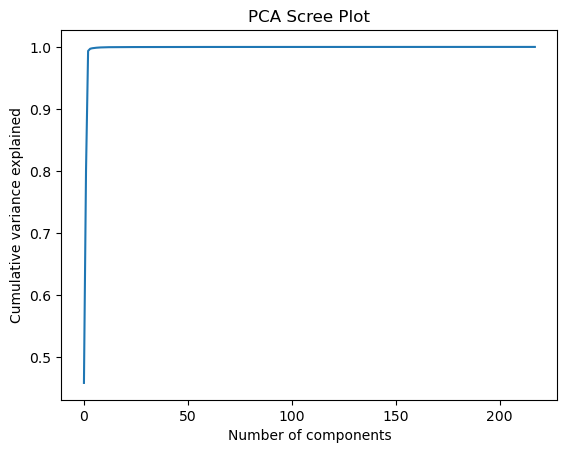

In [7]:
# Preliminary PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

X = StandardScaler().fit_transform(data1[bands].sample(20000, random_state=1))
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance explained")
plt.title("PCA Scree Plot")
plt.show()

# The curve rises very steeply at the beginning and then flattens quickly
# This suggests that a small number of components can capture most of the variance in the data, which is promising for dimensionality reduction before classification.

In [ ]:
#hey there!